In [1]:
import torch

## 2.1 Создание нейронов и полносвязных слоев

2.1.1. Используя операции над матрицами и векторами из библиотеки `torch`, реализовать нейрон с заданными весами `weights` и `bias`. Прогнать вектор `inputs` через нейрон и вывести результат. 

In [2]:
class Neuron:
    def __init__(self, weights, bias):
        self.weights = weights
        self.bias = bias
        pass
    
    def forward(self, inputs):
        y_pred = torch.matmul(self.weights, inputs) + self.bias
        return y_pred


In [3]:
inputs = torch.tensor([1.0, 2.0, 3.0, 4.0])
weights = torch.tensor([-0.2, 0.3, -0.5, 0.7])
bias = 3.14

In [4]:
N = Neuron(weights,bias)
y = N.forward(inputs)
print(y)

tensor(4.8400)


2.1.2 Используя операции над матрицами и векторами из библиотеки `torch`, реализовать полносвязный слой с заданными весами `weights` и `biases`. Прогнать вектор `inputs` через слой и вывести результат. 

In [5]:
class Linear:
    def __init__(self, weights, biases):
        self.weights = weights
        self.biases = biases
        pass
  
    def forward(self, inputs):
        y_pred = torch.matmul(self.weights, inputs) + self.biases
        return y_pred

In [6]:
inputs = torch.tensor([1.0, 2.0, 3.0, 4.0])
weights = torch.tensor([[-0.2, 0.3, -0.5, 0.7],
                        [0.5, -0.91, 0.26, -0.5],
                        [-0.26, -0.27, 0.17, 0.87]])

biases = torch.tensor([3.14, 2.71, 7.2])

In [7]:
l = Linear(weights,biases)
y = l.forward(inputs)
y

tensor([ 4.8400,  0.1700, 10.3900])

2.1.3 Реализовать полносвязный слой из __2.1.2__ таким образом, чтобы он мог принимать на вход матрицу (батч) с данными. Продемонстрировать работу.
Результатом прогона сквозь слой должна быть матрица размера `batch_size` x `n_neurons`.


In [8]:
class Linear:
    def __init__(self, weights, biases):
        self.weights = weights
        self.biases = biases
        pass
  
    def forward(self, inputs):
        y_pred = torch.matmul(self.weights, inputs) + self.biases
        return y_pred

In [9]:
inputs = torch.tensor([[1, 2, 3, 4], 
                       [2, 5, -1, 2], 
                       [-1.5, 2.7, 3.3, -0.8]])

In [10]:
inputs.size()

torch.Size([3, 4])

In [11]:
l = Linear(weights,biases)
y = l.forward(inputs.T)
y

tensor([[ 4.8400,  5.7100,  6.1000],
        [ 0.6000, -2.1000,  5.2510],
        [ 6.3300,  2.4100,  6.7260]])

2.1.4 Используя операции над матрицами и векторами из библиотеки `torch`, реализовать полносвязный слой из `n_neurons` нейронов с `n_features` весами у каждого нейрона (инициализируются из стандартного нормального распределения). Прогнать вектор `inputs` через слой и вывести результат. Результатом прогона сквозь слой должна быть матрица размера `batch_size` x `n_neurons`.

In [12]:
class Linear:
    def __init__(self, n_features, n_neurons):
        self.w = torch.randn(n_features, n_neurons)
        self.b = torch.randn(n_neurons)
        
    def forward(self, inputs):
        y_pred = torch.matmul(inputs, self.w) + self.b
        return y_pred

In [13]:
inputs = torch.tensor([[1, 2, 3, 2.5], 
                       [2, 5, -1, 2], 
                       [-1.5, 2.7, 3.3, -0.8]])

In [14]:
l = Linear(4,3)
print(l.w)
print(inputs)
print(l.b)

tensor([[ 0.4849,  0.0817, -1.5032],
        [-0.4461,  1.9646, -0.0217],
        [-1.3699, -0.3554,  0.3440],
        [ 0.9223,  0.1696, -0.0905]])
tensor([[ 1.0000,  2.0000,  3.0000,  2.5000],
        [ 2.0000,  5.0000, -1.0000,  2.0000],
        [-1.5000,  2.7000,  3.3000, -0.8000]])
tensor([-1.2970,  1.0738, -1.4751])


In [15]:
y_pred = l.forward(inputs)
y_pred

tensor([[-3.5080,  4.4427, -2.2159],
        [ 0.6570, 11.7551, -5.1152],
        [-8.4872,  4.9472,  1.9288]])

2.1.5 Используя решение из __2.1.4__, создать 2 полносвязных слоя и пропустить матрицу `inputs` последовательно через эти два слоя. Количество нейронов в первом слое выбрать произвольно, количество нейронов во втором слое выбрать так, чтобы результатом прогона являлась матрица (3x7). 

In [16]:
inputs = torch.tensor([[1, 2, 3, 2.5], 
                       [2, 5, -1, 2], 
                       [-1.5, 2.7, 3.3, -0.8]])

In [17]:
class Linear_2:
    def __init__(self, n_features, n_neurons):
        self.w = torch.randn(n_features, n_neurons)
        self.b = torch.randn(n_neurons)
        
    def forward(self, inputs):
        y_pred = torch.matmul(inputs, self.w) + self.b
        return y_pred

In [18]:
l1 = Linear_2(4,3) # first layer

y_pred1 = l.forward(inputs)
print(y_pred1)


l2 = Linear_2(3,7) # second layer

y_pred2 = l2.forward(y_pred1)
y_pred2


tensor([[-3.5080,  4.4427, -2.2159],
        [ 0.6570, 11.7551, -5.1152],
        [-8.4872,  4.9472,  1.9288]])


tensor([[  5.7258,   5.4405,   0.2228,   3.8428,   4.5687,  -1.5987,   4.1517],
        [ 10.7078,   4.7071,  -1.8230,  25.3467,  19.2826,  11.7494,   3.2795],
        [  0.1455,   8.1473,  -4.7163,  -7.5659,  -0.2676, -12.1521,  10.8347]])

## 2.2 Создание функций активации

2.2.1 Используя операции над матрицами и векторами из библиотеки `torch`, реализовать функцию активации ReLU:

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/f4353f4e3e484130504049599d2e7b040793e1eb)

Создать матрицу размера (4,3), заполненную числами из стандартного нормального распределения, и проверить работоспособность функции активации.

In [19]:
class ReLU:
    def forward(self, inputs):
        relu_result = inputs.clone()
        relu_result[relu_result < 0] = 0 
        return relu_result

In [20]:
inputs = torch.randn(4,3)
inputs

tensor([[-0.1741, -0.6289,  0.9170],
        [-0.6876, -0.9656,  0.4235],
        [-0.8875, -1.0886,  0.2690],
        [ 1.0102,  0.4328, -0.4309]])

In [21]:
r = ReLU()
r.forward(inputs)

tensor([[0.0000, 0.0000, 0.9170],
        [0.0000, 0.0000, 0.4235],
        [0.0000, 0.0000, 0.2690],
        [1.0102, 0.4328, 0.0000]])

2.2.2 Используя операции над матрицами и векторами из библиотеки `torch`, реализовать функцию активации softmax:

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/6d7500d980c313da83e4117da701bf7c8f1982f5)

Создать матрицу размера (4,3), заполненную числами из стандартного нормального распределения, и проверить работоспособность функции активации. Строки матрицы трактовать как выходы линейного слоя некоторого классификатора для 4 различных примеров.

In [22]:
class Softmax:
    def forward(self, inputs):
        return torch.exp(inputs) / sum(torch.exp(inputs))
    

In [23]:
inputs = torch.randn(4,3)
inputs

tensor([[ 0.9502, -1.0567, -1.5954],
        [-0.9757,  0.0439,  0.7245],
        [-0.7422, -1.8955, -1.9352],
        [ 1.0546,  0.0143, -0.4904]])

In [24]:
sm = Softmax()
sm.forward(inputs)

tensor([[0.4099, 0.1359, 0.0671],
        [0.0597, 0.4086, 0.6826],
        [0.0754, 0.0588, 0.0478],
        [0.4550, 0.3967, 0.2025]])

2.2.3 Используя операции над матрицами и векторами из библиотеки `torch`, реализовать функцию активации ELU:

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/eb23becd37c3602c4838e53f532163279192e4fd)

Создать матрицу размера (4,3), заполненную числами из стандартного нормального распределения, и проверить работоспособность функции активации.

In [25]:
class ELU:
    def __init__(self, alpha):
        self.alpha = alpha
        

    def forward(self, inputs):
        res_inputs = inputs.clone()
        res_inputs[res_inputs < 0] = self.alpha * (torch.exp(res_inputs[res_inputs < 0]) - 1)
        return res_inputs
        

In [26]:
inputs = torch.randn(4,3)
inputs

tensor([[ 0.5537,  1.0802,  0.8875],
        [ 0.4997, -0.4979, -0.3349],
        [ 0.4824, -0.4279,  1.2042],
        [ 1.0630, -1.2183, -0.6573]])

In [27]:
e = ELU(0.1)
e.forward(inputs)

tensor([[ 0.5537,  1.0802,  0.8875],
        [ 0.4997, -0.0392, -0.0285],
        [ 0.4824, -0.0348,  1.2042],
        [ 1.0630, -0.0704, -0.0482]])

## 2.3 Создание функции потерь

2.3.1 Используя операции над матрицами и векторами из библиотеки `torch`, реализовать функцию потерь MSE:

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/e258221518869aa1c6561bb75b99476c4734108e)

Создать полносвязный слой с 1 нейроном, прогнать через него батч `inputs` и посчитать значение MSE, трактуя вектор `y` как вектор правильных ответов.

In [28]:
import torch.nn as nn
import math
class MSELoss:
    def forward(self, y_pred, y_true):
        mse = (1 / len(y_pred)) *  (y_pred - y_true) ** 2        
        return mse


In [29]:
inputs = torch.tensor([[1, 2, 3, 2.5], 
                       [2, 5, -1, 2], 
                       [-1.5, 2.7, 3.3, -0.8]])

y = torch.tensor([2, 3, 4])

In [30]:
import torch
import torch.nn as nn

layer = nn.Linear(4, 1) 


y_pred = layer(inputs)


m = MSELoss()

loss = m.forward(y_pred, y)

print(loss)


tensor([[ 1.4749,  3.2105,  5.6128],
        [ 4.0470,  6.7033, 10.0262],
        [ 2.1456,  4.1704,  6.8618]], grad_fn=<MulBackward0>)


2.3.2 Используя операции над матрицами и векторами из библиотеки `torch`, реализовать функцию потерь Categorical Cross-Entropy:

<img src="https://i.ibb.co/93gy1dN/Screenshot-9.png" width="200">

Создать полносвязный слой с 3 нейронами и прогнать через него батч `inputs`. Полученный результат пропустить через функцию активации softmax. Посчитать значение CCE, трактуя вектор `y` как вектор правильных ответов.

In [31]:
class CategoricalCrossentropyLoss:
    def forward(self, y_pred, y_true):
        cross = -torch.sum(y_true * torch.log(y_pred))
        return cross
        

In [32]:
inputs = torch.tensor([[1, 2, 3, 2.5], 
                        [2, 5, -1, 2], 
                        [-1.5, 2.7, 3.3, -0.8]])
y = torch.tensor([1, 0, 0])

In [33]:
import torch
import torch.nn as nn

layer = nn.Linear(4, 3) 


y_pred = layer(inputs)
print(y_pred)
sm = Softmax()
y_pred = sm.forward(y_pred)

c = CategoricalCrossentropyLoss()
print(y_pred)
print(y)
cross = c.forward(y_pred, y)

print(cross.item())


tensor([[-0.1945, -0.3077,  2.0151],
        [-1.4185, -0.0877,  1.0461],
        [-0.2886,  0.5425,  2.9788]], grad_fn=<AddmmBackward0>)
tensor([[0.4537, 0.2180, 0.2500],
        [0.1334, 0.2717, 0.0948],
        [0.4129, 0.5102, 0.6552]], grad_fn=<DivBackward0>)
tensor([1, 0, 0])
3.6892175674438477


2.3.3 Модифицировать 2.3.1, добавив L2-регуляризацию.

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/d92ca2429275bfdc0474523babbafe014ca8b580)


In [34]:
import torch
import torch.nn as nn

class MSELossL2:
    def __init__(self, lambda_):
        self.lambda_ = lambda_

    def data_loss(self, y_pred, y_true):
        l_data = ((y_true - y_pred) ** 2).sum()
        return l_data

    def reg_loss(self, layer):
        l_2 = self.lambda_ * (layer.weight ** 2).sum()
        return l_2

    def forward(self, y_pred, y_true):
        return self.data_loss(y_pred, y_true)

In [35]:
inputs = torch.tensor([[1, 2, 3, 2.5], 
                        [2, 5, -1, 2], 
                        [-1.5, 2.7, 3.3, -0.8]])
y = torch.tensor([2, 3, 4])

In [40]:
l = nn.Linear(4,3)
y_pred = l.forward(inputs)

mse2 = MSELossL2(0.1)
loss = mse2.forward(y_pred, y)
print(loss.item())

92.49002075195312


## 2.4 Обратное распространение ошибки

2.4.1 Используя один нейрон и SGD (1 пример за шаг), решите задачу регрессии

In [46]:
from sklearn.datasets import make_regression

X, y, coef = make_regression(n_features=4, n_informative=4, coef=True, bias=0.5)
X,y
X = torch.tensor(X, dtype = torch.float32)
y = torch.tensor(y, dtype = torch.float32)

print(X.shape)
print(y.shape)

torch.Size([100, 4])
torch.Size([100])


[Граф вычислений для этой задачи](https://i.ibb.co/2dhDxZx/photo-2021-02-15-17-18-04.jpg)

2.4.1.1 Реализуйте класс `SquaredLoss`


In [63]:
class SquaredLoss:
    def forward(self, y_pred, y_true):
        return (y_pred - y_true) ** 2
    
    def backward(self, y_pred, y_true):
        return 2 * (y_pred - y_true)
         


2.4.1.2. Модифицируйте класс `Neuron` из __2.1.1__:

  1) Сделайте так, чтобы веса нейрона инициализировались из стандартного нормального распределения

  2) Реализуйте расчет градиента относительно весов `weights` и `bias`

In [156]:
import numpy as np


class Neuron:
    def __init__(self, n_inputs):
        self.weights = torch.randn(n_inputs)
        self.bias = torch.randn(1)
        
    def forward(self, inputs):
        return torch.matmul(self.weights, inputs) + self.bias
    
    def backward(self, x_example, dvalue):
    # dvalue - значение производной, которое приходит нейрону от следующего слоя сети
    # в данном случае это будет значение df/dc (созданное методом backwards у объекта MSELoss)
        self.dweights = dvalue * x_example   # df/dW
        self.dinput = torch.matmul(self.dweights, self.weights.t())   # df/dX
        self.dbias = dvalue  # df/db


2.4.1.3 Допишите цикл для настройки весов нейрона

[SGD](https://ru.wikipedia.org/wiki/%D0%A1%D1%82%D0%BE%D1%85%D0%B0%D1%81%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B8%D0%B9_%D0%B3%D1%80%D0%B0%D0%B4%D0%B8%D0%B5%D0%BD%D1%82%D0%BD%D1%8B%D0%B9_%D1%81%D0%BF%D1%83%D1%81%D0%BA)

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/dda3670f8a8996a0d3bf80856bb4a166cc8db6d4)

In [157]:
n_inputs = 4 # X.shape
learning_rate = 0.001 #  скорость обучения
n_epoch = 100 #  количество эпох

neuron = Neuron(n_inputs)
loss = SquaredLoss()

losses = []
print(neuron.weights)
for epoch in range(100):
    if epoch % 10 == 0: 
        print(f"Эпоха {epoch}")
        print(f"neuron.weights {neuron.weights}")
        print(f"neuron.bias {neuron.bias}")

    for x_example, y_example in zip(X, y):
        # forward pass
        y_pred = neuron.forward(x_example)
        curr_loss = loss.forward(y_pred, y_example)
        losses.append(curr_loss)

        # backprop
        loss_gradient = loss.backward(y_pred, y_example)
        # <вызов методов backward>
        # обратите внимание на последовательность вызовов: от конца к началу
        neuron.backward(x_example, loss_gradient)
        
        neuron.weights -= learning_rate * neuron.dweights
        neuron.bias -= learning_rate * neuron.dbias

        # <шаг оптимизации для весов (weights и bias) нейрона>
        
print(neuron.weights)


tensor([ 0.2200,  1.9814,  0.9400, -0.1284])
Эпоха 0
neuron.weights tensor([ 0.2200,  1.9814,  0.9400, -0.1284])
neuron.bias tensor([-0.7967])
Эпоха 10
neuron.weights tensor([31.4924, 66.7419, 13.5734, 70.4663])
neuron.bias tensor([-0.7689])
Эпоха 20
neuron.weights tensor([39.2711, 77.5649, 17.6766, 83.8363])
neuron.bias tensor([0.2104])
Эпоха 30
neuron.weights tensor([41.0080, 79.5346, 18.6909, 86.3723])
neuron.bias tensor([0.4474])
Эпоха 40
neuron.weights tensor([41.3792, 79.9123, 18.9206, 86.8543])
neuron.bias tensor([0.4913])
Эпоха 50
neuron.weights tensor([41.4569, 79.9869, 18.9708, 86.9460])
neuron.bias tensor([0.4986])
Эпоха 60
neuron.weights tensor([41.4730, 80.0019, 18.9815, 86.9636])
neuron.bias tensor([0.4998])
Эпоха 70
neuron.weights tensor([41.4763, 80.0050, 18.9838, 86.9668])
neuron.bias tensor([0.5000])
Эпоха 80
neuron.weights tensor([41.4769, 80.0055, 18.9843, 86.9673])
neuron.bias tensor([0.5000])
Эпоха 90
neuron.weights tensor([41.4771, 80.0055, 18.9844, 86.9674])
neu

2.4.2 Решите задачу 2.4.1, используя пакетный градиентный спуск

Вычисления для этой задачи: 
[1](https://i.ibb.co/rmtQT6P/photo-2021-02-15-18-00-43.jpg)
[2](https://i.ibb.co/NmCFVnQ/photo-2021-02-15-18-01-17.jpg)

2.4.1.1 Модифицируйте класс `MSELoss` из __2.3.1__, реализовав расчет производной относительно предыдущего слоя с учетом того, что теперь работа ведется с батчами, а не с индивидуальными примерами
 

In [134]:
class MSELoss:
    def forward(self, y_pred, y_true):
        return ((y_true - y_pred)**2).mean()
    
    def backward(self, y_pred, y_true):
        return - (2 / y_pred.size()[0]) * (y_true - y_pred)  # df/dy^
         


2.4.2.2. Модифицируйте класс `Neuron` из __2.4.1.2__:

  1) Реализуйте метод `forward` таким образом, чтобы он мог принимать на вход матрицу (батч) с данными. 

  2) Реализуйте расчет градиента относительно весов `weights` и `bias` с учетом того, что теперь работа ведется с батчами, а не с индивидуальными примерами

In [184]:
class Neuron:
    def __init__(self, n_inputs):
        self.weights = torch.randn(n_inputs)
        self.bias = torch.randn(1)
        
    def forward(self, inputs):
        self.inputs = inputs
        return torch.matmul(inputs, self.weights) + self.bias

    def backward(self, dvalue):
        print(dvalue.shape)
        
        # dvalue - значение градиента, которое приходит нейрону от следующего слоя сети
        # в данном случае это будет градиент L по y^ (созданный методом backwards у объекта MSELoss)
        self.dweights = dvalue @ self.inputs # df/dW
        self.dbias = dvalue.sum() # df/db


2.4.2.3 Допишите цикл для настройки весов нейрона

In [185]:
n_inputs = 4
learning_rate = 0.1 #  скорость обучения
n_epoch = 100 #  количество эпох

neuron = Neuron(n_inputs)
loss = MSELoss()

print()

for epoch in range(100):
    
    if epoch % 10 == 0: 
        print(f"Эпоха {epoch}")
        print(f"neuron.weights {neuron.weights}")
        print(f"neuron.bias {neuron.bias}")
    # forward pass
    y_pred = neuron.forward(X) # <прогон через нейрон>
    curr_loss = loss.forward(y_pred, y)
    losses.append(curr_loss)

    # backprop
    loss_gradient = loss.backward(y_pred, y)
    # <вызов методов backward>
    # обратите внимание на последовательность вызовов: от конца к началу
    neuron.backward(loss_gradient)

    neuron.weights -= learning_rate * neuron.dweights
    neuron.bias -= learning_rate * neuron.dbias

    # <шаг оптимизации для весов (weights и bias) нейрона>



Эпоха 0
neuron.weights tensor([-0.3258, -0.4940,  0.5836,  1.4728])
neuron.bias tensor([0.7162])
torch.Size([100])
torch.Size([100])
torch.Size([100])
torch.Size([100])
torch.Size([100])
torch.Size([100])
torch.Size([100])
torch.Size([100])
torch.Size([100])
torch.Size([100])
Эпоха 10
neuron.weights tensor([32.3549, 68.2951, 13.9015, 72.9823])
neuron.bias tensor([-0.5924])
torch.Size([100])
torch.Size([100])
torch.Size([100])
torch.Size([100])
torch.Size([100])
torch.Size([100])
torch.Size([100])
torch.Size([100])
torch.Size([100])
torch.Size([100])
Эпоха 20
neuron.weights tensor([39.7095, 78.1055, 17.9051, 84.6716])
neuron.bias tensor([0.2859])
torch.Size([100])
torch.Size([100])
torch.Size([100])
torch.Size([100])
torch.Size([100])
torch.Size([100])
torch.Size([100])
torch.Size([100])
torch.Size([100])
torch.Size([100])
Эпоха 30
neuron.weights tensor([41.1488, 79.6796, 18.7720, 86.5895])
neuron.bias tensor([0.4675])
torch.Size([100])
torch.Size([100])
torch.Size([100])
torch.Size([1

2.4.3  Используя один полносвязный слой и  пакетный градиетный спуск, решите задачу регрессии из __2.4.1__

2.4.3.1 Модифицируйте класс `Linear` из __2.1.4__. ([вычисление градиентов](https://i.ibb.co/kgVR6m6/photo-2021-02-15-21-30-28.jpg))

In [218]:
class Linear:
    def __init__(self, n_features, n_neurons):
        self.weights = torch.randn(n_features, n_neurons)
        self.biases = torch.randn(n_neurons)
        # <создать атрибуты объекта weights и biases>
  
    def forward(self, inputs):
        self.inputs = inputs
        return torch.matmul(inputs, self.weights) + self.biases

    def backward(self, dvalues):
        self.dweights = torch.matmul(self.inputs.T, dvalues)  # df/dW
        self.dbiases = torch.sum(dvalues, dim=0)  # df/db
        self.dinputs = torch.matmul(dvalues, self.weights.T)  # df/dX
        return self.dinputs  # Возвращаем градиенты по входам

        
    
        
        


2.4.3.2 Создайте слой с одним нейроном. Используя класс MSELoss из 2.4.2, убедитесь, что модель обучается

2.4.4 Используя наработки из 2.4, создайте нейросеть и решите задачу регрессии.

Предлагаемая архитектура: 
1. Полносвязный слой с 10 нейронами
2. Активация ReLU
3. Полносвязный слой с 1 нейроном

In [219]:
X = torch.linspace(-1, 1, 100).view(-1, 1)
y = X.pow(2) + 0.2 * torch.rand(X.size()) 

In [220]:
X.shape ,y.shape

(torch.Size([100, 1]), torch.Size([100, 1]))

In [221]:
class Activation_ReLU:
    def forward(self, inputs):
        self.inputs = inputs
        self.output = inputs.clip(min=0)
        return self.output

    def backward(self, dvalues):
        self.dinputs = dvalues.clone()
        self.dinputs[self.inputs <= 0] = 0
        return self.dinputs

In [225]:
# создание компонентов сети
fc1 = Linear(1,10)
relu1 = Activation_ReLU()
fc2 = Linear(10,1)

loss = MSELoss()
lr = 0.02

ys = []
for epoch in range(2001):
    # <forward pass>
    # fc1 > relu1 > fc2 > loss
    x1 = fc1.forward(X)
    x2 = relu1.forward(x1)
    output = fc2.forward(x2)

    data_loss = loss.forward(output, y) # <прогон через функцию потерь>

    if epoch % 200 == 0:
        print(f'epoch {epoch} mean loss {data_loss}')
        ys.append(output)

    # <backprop> 
    # loss > fc2 > relu1 > fc1
    dvalues = loss.backward(output, y)
    dvalues = fc2.backward(dvalues)  
    dvalues = relu1.backward(dvalues)  
    dvalues = fc1.backward(dvalues) 

    # <шаг оптимизации для fc1>
    fc1.weights -=  learning_rate * fc1.dweights
    fc1.biases = learning_rate * fc1.dbiases

    # <шаг оптимизации для fc2>
    fc2.weights -=  learning_rate * fc2.dweights
    fc2.biases = learning_rate * fc2.dbiases


epoch 0 mean loss 0.1337026208639145
epoch 200 mean loss 0.009514102712273598
epoch 400 mean loss 0.009513502940535545
epoch 600 mean loss 0.009512901306152344
epoch 800 mean loss 0.009512295946478844
epoch 1000 mean loss 0.009511696174740791
epoch 1200 mean loss 0.009511097334325314
epoch 1400 mean loss 0.009510503150522709
epoch 1600 mean loss 0.009509912692010403
epoch 1800 mean loss 0.009509315714240074
epoch 2000 mean loss 0.009508728049695492


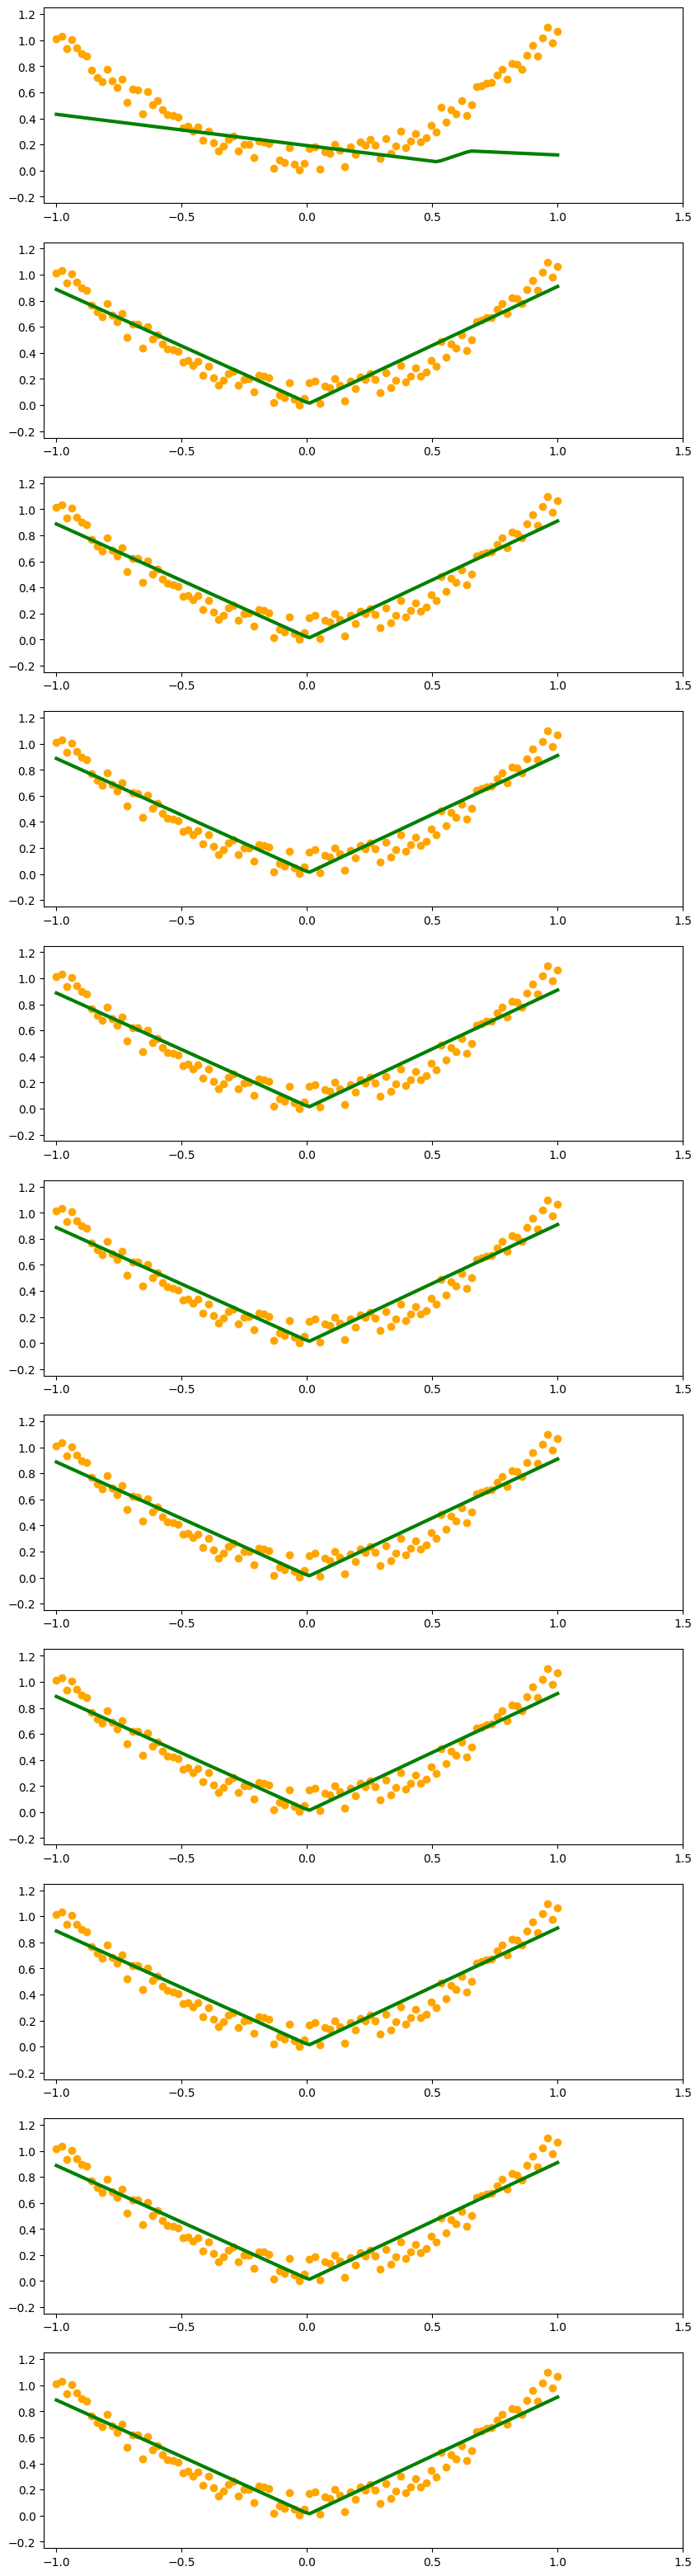

In [226]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(len(ys), 1, figsize=(10, 40))
for ax, y_ in zip(axs, ys):
    ax.scatter(X.numpy(), y.numpy(), color = "orange")
    ax.plot(X.numpy(), y_.numpy(), 'g-', lw=3)
    ax.set_xlim(-1.05, 1.5)
    ax.set_ylim(-0.25, 1.25)